In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from russian_exports_functions import *

In [38]:
"""## Data Preprocessing"""
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
dataset = pd.read_csv("RUStoWorldTrade.csv", error_bad_lines=False)
print(dataset)
print(dataset.nunique())
#Dataset is large, so I will drop all rows with NAN as this shouldn't affect 
#data processing
dataset.dropna(inplace = True)
data_processor(dataset)
#Dropping redundant data fields that don't need to be used in modelling
dataset = dataset.drop(['Classification','index','Partner Code',
'Partner ISO','Reporter Code','Reporter',
'Reporter ISO','Qty Unit Code', 'Qty Unit','Commodity'], axis = 1)
#Reduce project into data entries with a trade (Qty > 0) and EU countries 
dataset = dataset[dataset.Qty != 0.0]
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 
                'Cyprus', 'Czechia', 'Denmark', 'Estonia',
                'Finland', 'France', 'Germany', 'Greece',
                'Hungary', 'Ireland', 'Italy', 'Latvia',
                'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 
                'Slovenia', 'Spain', 'Sweden']
dataset = dataset[dataset['Partner'].isin(EU_countries)]
median_trade_value = dataset["Trade Value (US$)"].median()
x = dataset["Trade Value (US$)"]
dataset["Large trades"] = np.select([x < median_trade_value, x >= median_trade_value], [0,1])  
print(dataset)
print(dataset.nunique())
#Display a random value for context
print(dataset.values[1000])

           index Classification  Year  Aggregate Level  Is Leaf Code  \
0              0             S4  2011                1             0   
1              1             S4  2012                1             0   
2              2             S4  2015                1             0   
3              3             S4  2016                1             0   
4              4             S4  2017                1             0   
...          ...            ...   ...              ...           ...   
1384598  1399186             S4  2017                1             0   
1384599  1399187             S4  2018                1             0   
1384600  1399188             S4  2019                1             0   
1384601  1399189             S4  2020                1             0   
1384602  1399190             S4  2020                1             0   

         Reporter Code            Reporter Reporter ISO  Partner Code  \
0                  643  Russian Federation          RUS       

VISUALISING THE TRADE CHANGES OVER THESE PERIODS

[['Austria', 0.008902641933395709], ['Belgium', 0.016102595504173117], ['Bulgaria', 0.021489608638677573], ['Croatia', 0.006715654669490061], ['Cyprus', 0.03448922250927041], ['Czechia', 0.019897206689787086], ['Denmark', 0.009274783111714988], ['Estonia', 0.010811450559987014], ['Finland', 0.07104757054442613], ['France', 0.03764146459772136], ['Germany', 0.11876963966094997], ['Greece', 0.012579350162986228], ['Hungary', 0.01778657538170959], ['Ireland', 0.004131784181412536], ['Italy', 0.07975237561789064], ['Latvia', 0.015783134189378725], ['Lithuania', 0.022131516210545404], ['Luxembourg', 0.0009902324915544028], ['Malta', 0.0032734960109500684], ['Netherlands', 0.30315772895393484], ['Poland', 0.07919047400459227], ['Portugal', 0.013184886352163624], ['Romania', 0.015357647680544009], ['Slovakia', 0.025028032556612935], ['Slovenia', 0.0010597528591647246], ['Spain', 0.030857316143722613], ['Sweden', 0.020593858783243952]]
[['Austria', 0.0013611734992988204], ['Belgium', 0.0253148

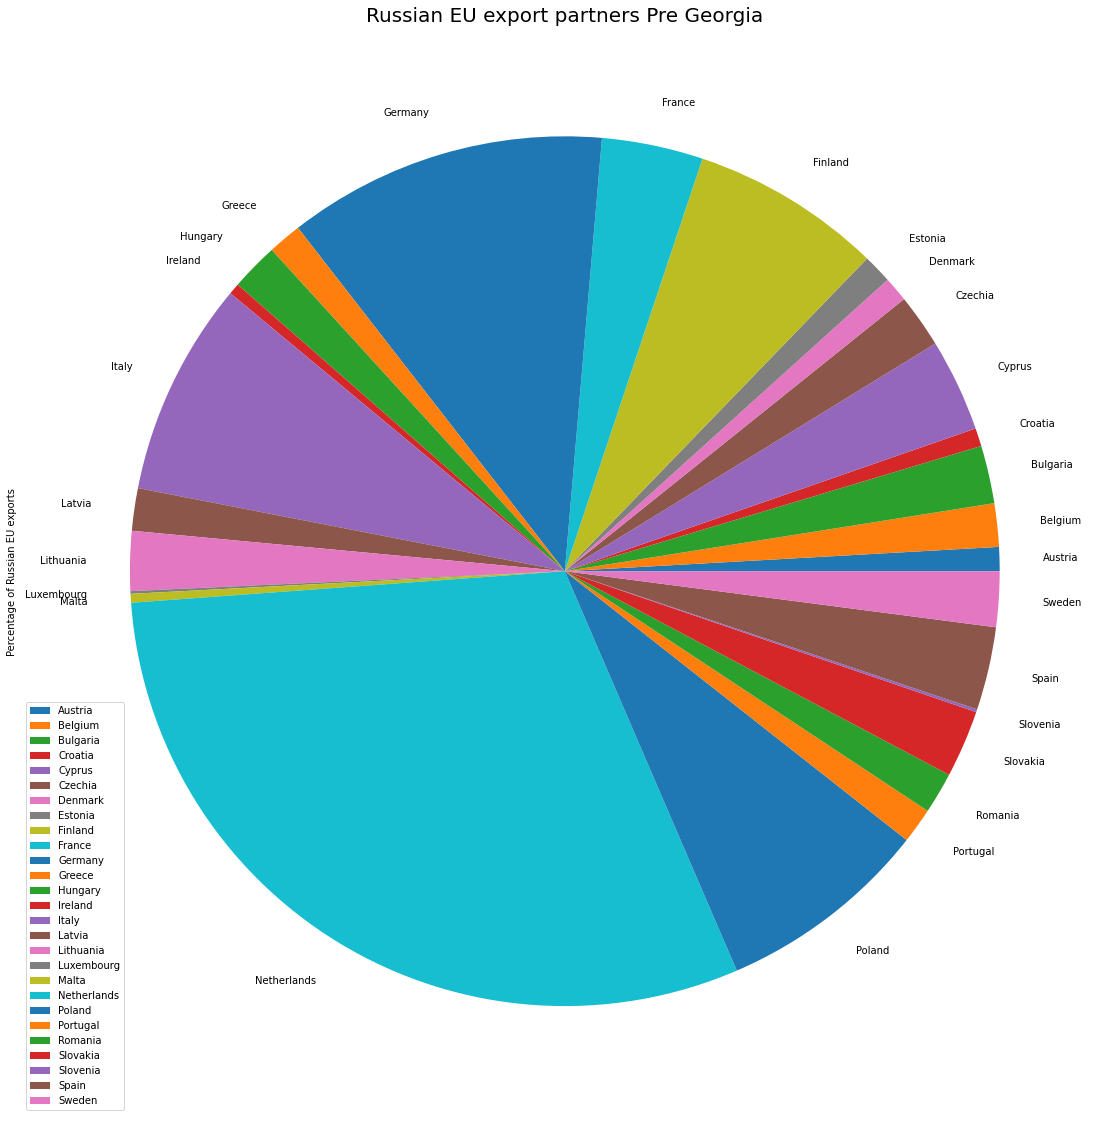

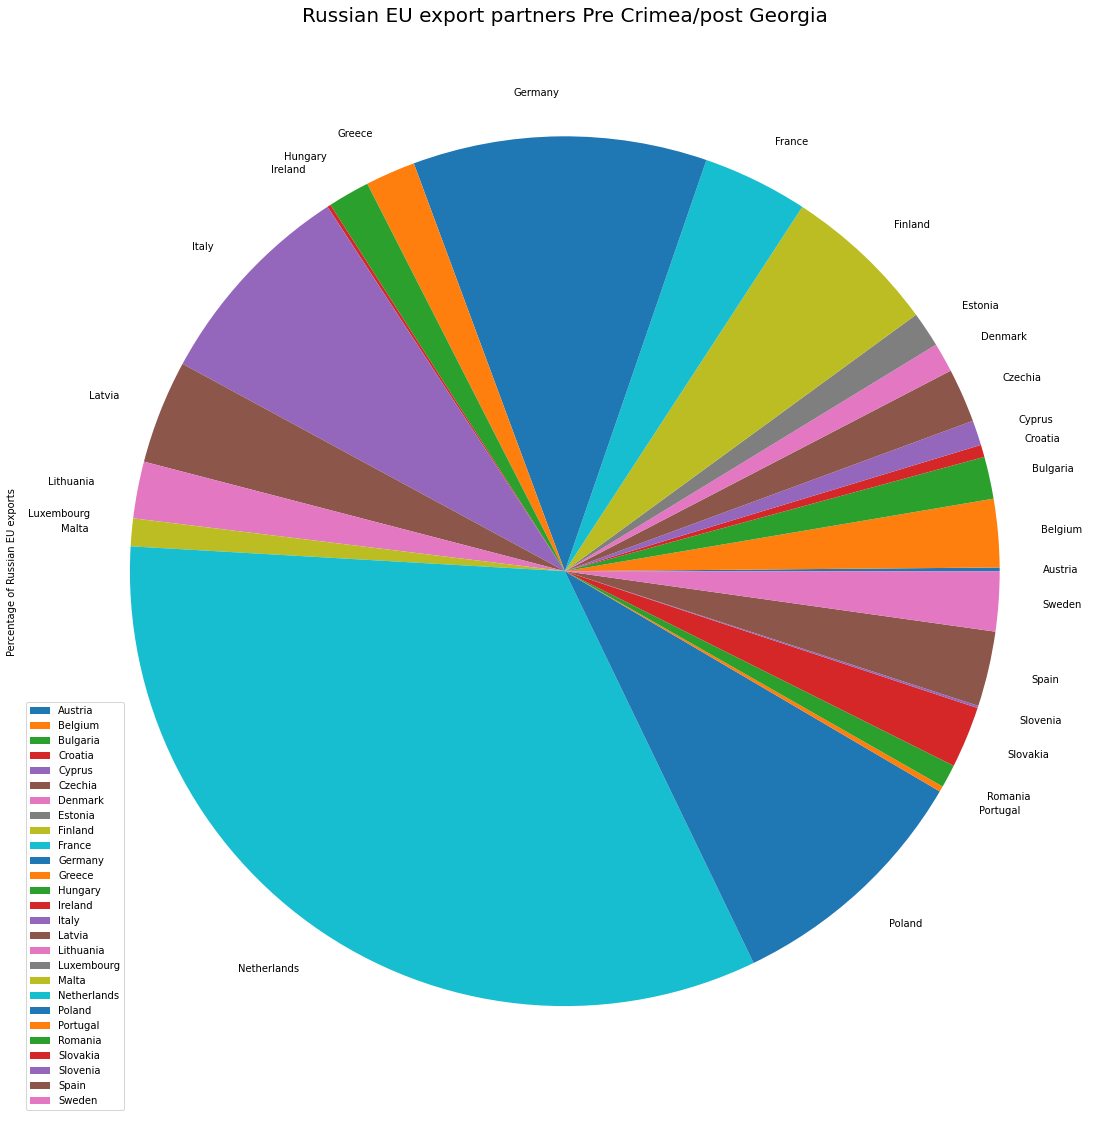

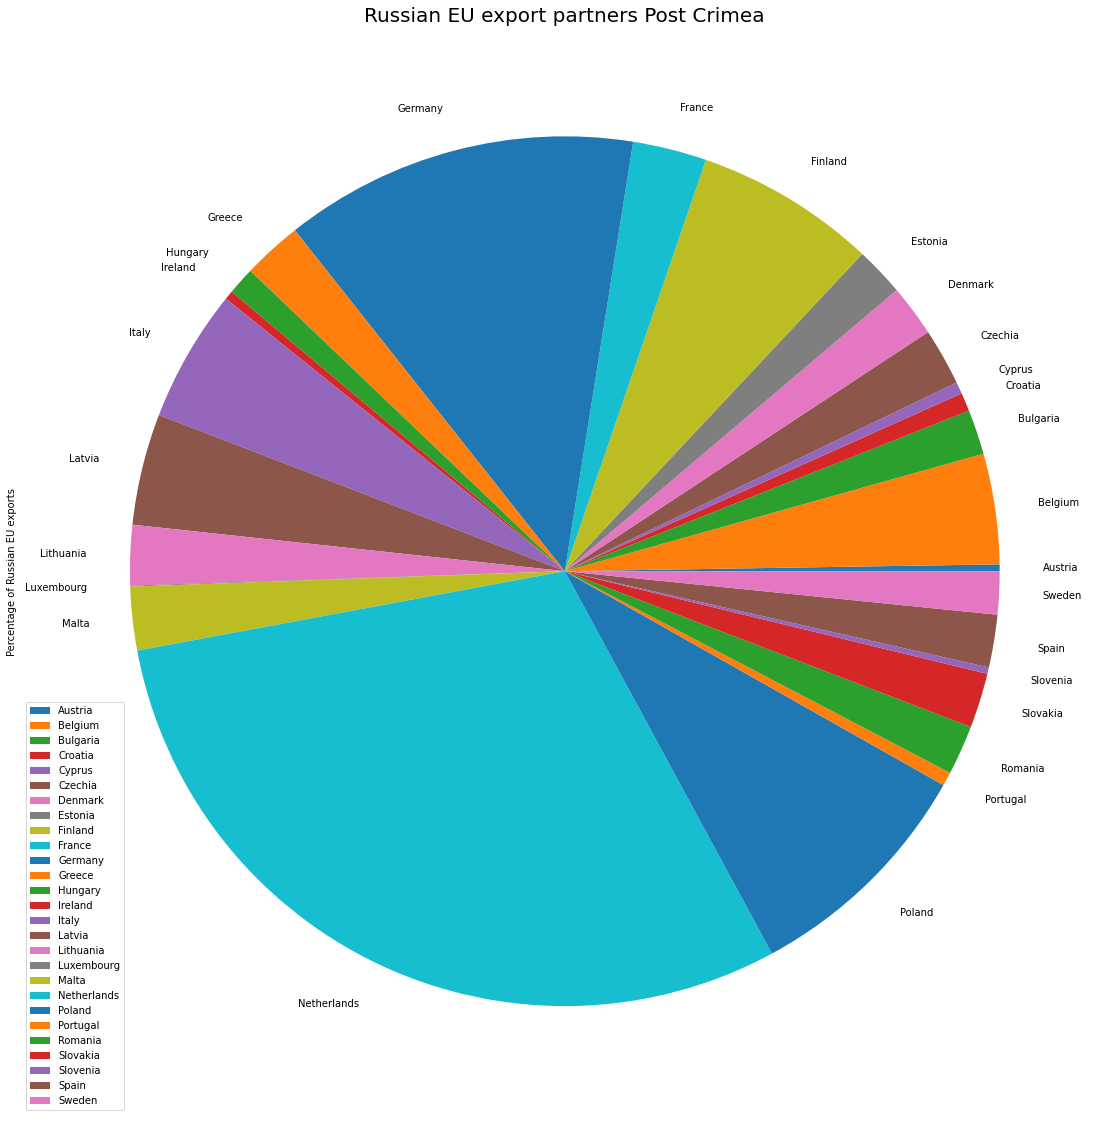

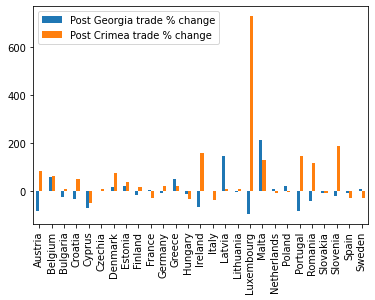

In [39]:
#Find the amount traded in exports with each country
pre_georgia_dataset = dataset[dataset['Year'] == 2007]

post_georgia_dataset = dataset[(dataset['Year'] >= 2009) 
                                        & (dataset['Year'] <= 2013)]
post_crimea_dataset = dataset[dataset['Year'] >= 2015]

#Displaying findings from the data over these two time periods
phase1 = eu_export_information(pre_georgia_dataset
                    , EU_countries, 'Pre Georgia')

phase2 = eu_export_information(post_georgia_dataset
                    , EU_countries, 'Pre Crimea/post Georgia')

phase3 = eu_export_information(post_crimea_dataset
                    , EU_countries, 'Post Crimea')
eu_export_changes(phase3, phase2, phase1, EU_countries)

USING XGBOOST TO PREDICT TRADE CLASSIFICATIONS WITH IMPRESSIVE RESULTS

In [40]:
model_accuracy_trades(pre_georgia_dataset)

[[2007 3 0 ... 2941254.0 2941254.0 791197]
 [2007 3 0 ... 40000.0 40000.0 23200]
 [2007 3 0 ... 340000.0 340000.0 185194]
 ...
 [2007 3 0 ... 11.0 11.0 608]
 [2007 3 0 ... 3.0 3.0 195]
 [2007 3 0 ... 3513.0 210.0 73338]]


ValueError: ignored

In [ ]:
model_accuracy_trades(post_georgia_dataset)

In [ ]:
model_accuracy_trades(post_crimea_dataset)

USING RANDOM FOREST TO PREDICT AGGREGATES AS IT HAS MULTIPLE CLASSES

[[2007 0 'Croatia' ... 2941254.0 791197 1]
 [2007 0 'Croatia' ... 40000.0 23200 0]
 [2007 0 'Croatia' ... 340000.0 185194 1]
 ...
 [2007 0 'Cyprus' ... 11.0 608 0]
 [2007 0 'Cyprus' ... 3.0 195 0]
 [2007 0 'Cyprus' ... 210.0 73338 1]]
RandomForest Classification Accuracy is: 97.67 %
K-Fold-Cross-Validation Accuracy is: 97.34 %
K-Fold-Cross-Validation Standard Deviation is: 0.47 %


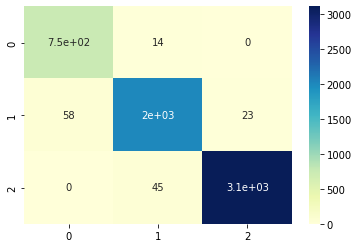

In [41]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(pre_georgia_dataset)

[[2009 0 'Croatia' ... 208832.0 155547 1]
 [2009 0 'Croatia' ... 11069.0 56733 1]
 [2009 0 'Croatia' ... 17237.0 120956 1]
 ...
 [2013 0 'Cyprus' ... 21.0 295 0]
 [2013 0 'Cyprus' ... 3.0 497 0]
 [2013 0 'Cyprus' ... 253.0 1389 0]]
RandomForest Classification Accuracy is: 98.30 %
K-Fold-Cross-Validation Accuracy is: 98.33 %
K-Fold-Cross-Validation Standard Deviation is: 0.13 %


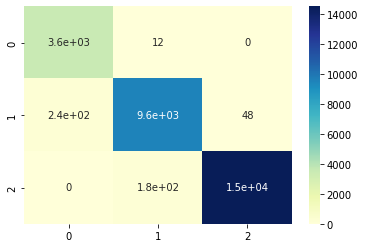

In [42]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(post_georgia_dataset)

[[2015 0 'Croatia' ... 273000.0 193176 1]
 [2015 0 'Croatia' ... 12411089.0 5002408 1]
 [2015 0 'Croatia' ... 80000.0 15539 0]
 ...
 [2020 0 'Cyprus' ... 75091.0 184724 1]
 [2020 0 'Cyprus' ... 3.0 17751 0]
 [2020 0 'Cyprus' ... 193.0 6524 0]]
RandomForest Classification Accuracy is: 98.27 %
K-Fold-Cross-Validation Accuracy is: 98.19 %
K-Fold-Cross-Validation Standard Deviation is: 0.14 %


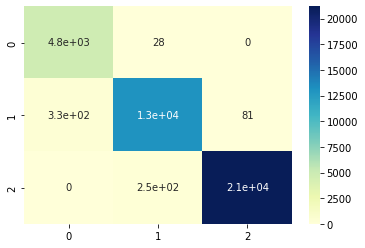

In [43]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(post_crimea_dataset)